# Eigenvector Decomposition

In [158]:
import sympy as smp
import numpy as np

A=smp.Matrix(3,3,[2,0,-1,0,4,0,-1,0,1])
A

Matrix([
[ 2, 0, -1],
[ 0, 4,  0],
[-1, 0,  1]])

In [2]:
x1,x2,x3=smp.symbols('x1 x2 x3') # 기호 정의
e=smp.symbols('e',nonzero=True) # 기호 정의
x=smp.Matrix(3,1,[x1,x2,x3])
# 행렬에서의 곱은 '@'을 쓰는게 좋다. 
smp.solve(A@x-e*x,[x1,x2,x3,e])

[(0, x2, 0, 4),
 (x3*(-1/2 + sqrt(5)/2), 0, x3, 3/2 - sqrt(5)/2),
 (x3*(-sqrt(5)/2 - 1/2), 0, x3, sqrt(5)/2 + 3/2),
 (0, 0, 0, e)]

In [3]:
x=smp.Matrix(3,1,[0,1,0])
A@x-4*x

Matrix([
[0],
[0],
[0]])

In [163]:
P,D=A.diagonalize()
D

Matrix([
[4,               0,               0],
[0, 3/2 - sqrt(5)/2,               0],
[0,               0, sqrt(5)/2 + 3/2]])

In [164]:
P

Matrix([
[0, -1/2 + sqrt(5)/2, -sqrt(5)/2 - 1/2],
[1,                0,                0],
[0,                1,                1]])

In [170]:
# 고유벡터인지 검증
for i in range(3):
    out=A@P[:,i]-D[i,i]*P[:,i]
    #pprint()를 사용하면 행렬 모양으로 출력된다.
    smp.pprint(out.evalf())

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
⎡-0.e-124⎤
⎢        ⎥
⎢   0    ⎥
⎢        ⎥
⎣   0    ⎦
⎡0.e-123⎤
⎢       ⎥
⎢   0   ⎥
⎢       ⎥
⎣   0   ⎦


In [171]:
# 고유벡터의 크기 출력
for i in range(3):
    out=P[:,i].T@P[:,i]
    smp.pprint(out.evalf())

[1.0]
[1.38196601125011]
[3.61803398874989]


In [174]:
O=P.T@P
O.evalf()

Matrix([
[1.0,                0,                0],
[  0, 1.38196601125011,          0.e-125],
[  0,          0.e-125, 3.61803398874989]])

In [64]:
A-P@D@P.inv() # P.inv()는 P의 역함수

Matrix([
[sqrt(5)*(-sqrt(5)/2 - 1/2)*(sqrt(5)/2 + 3/2)/5 - (-1/2 + sqrt(5)/2)*(1 - sqrt(5))*(3/2 - sqrt(5)/2)/(-5 + sqrt(5)) + 2, 0, -1 - (-1/2 + sqrt(5)/2)*(3/2 - sqrt(5)/2)/(5/2 - sqrt(5)/2) - (1/2 - sqrt(5)/10)*(-sqrt(5)/2 - 1/2)*(sqrt(5)/2 + 3/2)],
[                                                                                                                     0, 0,                                                                                                                     0],
[                                     -1 - (1 - sqrt(5))*(3/2 - sqrt(5)/2)/(-5 + sqrt(5)) + sqrt(5)*(sqrt(5)/2 + 3/2)/5, 0,                                       -(1/2 - sqrt(5)/10)*(sqrt(5)/2 + 3/2) - (3/2 - sqrt(5)/2)/(5/2 - sqrt(5)/2) + 1]])

In [65]:
_.evalf() # 도는 값들을 숫자로 계산

Matrix([
[-0.e-127, 0, 0.e-126],
[       0, 0,       0],
[ 0.e-126, 0, 0.e-125]])

In [57]:
sol=smp.solve(A@x-e*x,[x1,x2,x3,e])
sol

{e: 4}

In [43]:
A@P-P@D

array([[-0.20081142, -3.79918858,  1.05146222],
       [-2.42784414, -4.        ,  5.05146222],
       [-3.80422607, -3.6750803 ,  1.05146222]])

# 넘파이 어레이 이해하기

In [99]:
A=np.array([[1,2],[3,4]])
B=A.T # .T를 하면 전치행렬(transposed matrix)이 된다. 

In [100]:
smp.Matrix(A) # 심파이를 이용해 쉽게 보기

Matrix([
[1, 2],
[3, 4]])

In [101]:
smp.Matrix(B)

Matrix([
[1, 3],
[2, 4]])

In [102]:
smp.Matrix(A@B) # @를 사용하면 행렬곱

Matrix([
[ 5, 11],
[11, 25]])

In [103]:
smp.Matrix(A*B) # '*'를 사용하면 같은 원소 위치끼리만 연산된다.

Matrix([
[1,  6],
[6, 16]])

In [104]:
A[0] # numpy array 슬라이싱은 한 줄씩 된다. 

array([1, 2])

In [105]:
A[0][1]

2

In [106]:
B[1][1]

4

In [14]:
import numpy as np 
np.random.seed(0) # 시드값 고정
D=np.random.randint(10,size=(3,4,5))
D

array([[[5, 0, 3, 3, 7],
        [9, 3, 5, 2, 4],
        [7, 6, 8, 8, 1],
        [6, 7, 7, 8, 1]],

       [[5, 9, 8, 9, 4],
        [3, 0, 3, 5, 0],
        [2, 3, 8, 1, 3],
        [3, 3, 7, 0, 1]],

       [[9, 9, 0, 4, 7],
        [3, 2, 7, 2, 0],
        [0, 4, 5, 5, 6],
        [8, 4, 1, 4, 9]]])

In [2]:
D.sum()

255

In [3]:
D.sum(axis=0)

array([[ 7, 14, 16,  6, 16],
       [19,  1,  3, 14, 12],
       [23, 18, 18, 10, 10],
       [ 8,  8, 14, 16, 22]])

In [4]:
D.sum(axis=1)

array([[14, 13, 26, 18, 23],
       [30, 15,  8, 11, 17],
       [13, 13, 17, 17, 20]])

In [5]:
D.sum(axis=2)

array([[18, 20, 35, 21],
       [21, 13, 16, 31],
       [20, 16, 28, 16]])

In [7]:
D.sum(axis=(0,1))

array([57, 41, 51, 46, 60])

In [8]:
D.sum(axis=0).sum(axis=0)

array([57, 41, 51, 46, 60])

## cumsum 이해하기

In [10]:
M0,M1,M2=D[0],D[1],D[2]
[M0,M0+M1,M0+M1+M2]

[array([[1, 3, 7, 1, 6],
        [4, 0, 1, 8, 7],
        [9, 5, 9, 7, 5],
        [0, 5, 9, 2, 5]]),
 array([[ 7, 12,  7,  2, 11],
        [13,  1,  2,  8,  9],
        [17,  9, 11,  8,  6],
        [ 7,  6, 14, 11, 14]]),
 array([[ 7, 14, 16,  6, 16],
        [19,  1,  3, 14, 12],
        [23, 18, 18, 10, 10],
        [ 8,  8, 14, 16, 22]])]

In [11]:
E0=np.array([i for i in range(1,11)])
E0.cumsum()

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

In [9]:
D.cumsum(axis=0)

array([[[ 1,  3,  7,  1,  6],
        [ 4,  0,  1,  8,  7],
        [ 9,  5,  9,  7,  5],
        [ 0,  5,  9,  2,  5]],

       [[ 7, 12,  7,  2, 11],
        [13,  1,  2,  8,  9],
        [17,  9, 11,  8,  6],
        [ 7,  6, 14, 11, 14]],

       [[ 7, 14, 16,  6, 16],
        [19,  1,  3, 14, 12],
        [23, 18, 18, 10, 10],
        [ 8,  8, 14, 16, 22]]])

In [3]:
import numpy as np 
np.random.seed(0) # 시드값 고정
D=np.random.randint(10,size=(3,4))
D

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [17]:
D.transpose()

array([[5, 7, 2],
       [0, 9, 4],
       [3, 3, 7],
       [3, 5, 6]])

In [18]:
np.transpose(D,(1,0))

array([[5, 7, 2],
       [0, 9, 4],
       [3, 3, 7],
       [3, 5, 6]])

In [3]:
D=np.random.randint(10,size=(3,4,5))
D

array([[[8, 8, 1, 6, 7],
        [7, 8, 1, 5, 9],
        [8, 9, 4, 3, 0],
        [3, 5, 0, 2, 3]],

       [[8, 1, 3, 3, 3],
        [7, 0, 1, 9, 9],
        [0, 4, 7, 3, 2],
        [7, 2, 0, 0, 4]],

       [[5, 5, 6, 8, 4],
        [1, 4, 9, 8, 1],
        [1, 7, 9, 9, 3],
        [6, 7, 2, 0, 3]]])

In [4]:
np.transpose(D,(0,2,1))

array([[[8, 7, 8, 3],
        [8, 8, 9, 5],
        [1, 1, 4, 0],
        [6, 5, 3, 2],
        [7, 9, 0, 3]],

       [[8, 7, 0, 7],
        [1, 0, 4, 2],
        [3, 1, 7, 0],
        [3, 9, 3, 0],
        [3, 9, 2, 4]],

       [[5, 1, 1, 6],
        [5, 4, 7, 7],
        [6, 9, 9, 2],
        [8, 8, 9, 0],
        [4, 1, 3, 3]]])

In [5]:
D=np.random.randint(10,size=(3,4))
D

array([[5, 9, 4, 4],
       [6, 4, 4, 3],
       [4, 4, 8, 4]])

In [26]:
np.expand_dims(D,axis=0)

array([[[5, 9, 4, 4],
        [6, 4, 4, 3],
        [4, 4, 8, 4]]])

In [28]:
np.expand_dims(D,axis=1)

array([[[5, 9, 4, 4]],

       [[6, 4, 4, 3]],

       [[4, 4, 8, 4]]])

In [29]:
# 앞 셀 결과의 shape 보기
_.shape

(3, 1, 4)

In [4]:
D1=np.random.randint(10,size=(3,4,5))
D2=np.expand_dims(D1,axis=1)
D2.shape

(3, 1, 4, 5)

In [7]:
D3=np.squeeze(D2)
D3.shape

(3, 4, 5)

In [8]:
D

array([[5, 9, 4, 4],
       [6, 4, 4, 3],
       [4, 4, 8, 4]])

In [40]:
D.reshape(12)

array([5, 9, 4, 4, 6, 4, 4, 3, 4, 4, 8, 4])

In [9]:
D.flatten()

array([5, 9, 4, 4, 6, 4, 4, 3, 4, 4, 8, 4])

In [42]:
D.reshape(2,6)

array([[5, 9, 4, 4, 6, 4],
       [4, 3, 4, 4, 8, 4]])

In [43]:
D.reshape(2,2,3)

array([[[5, 9, 4],
        [4, 6, 4]],

       [[4, 3, 4],
        [4, 8, 4]]])

In [5]:
E0=np.array([1,2,3])
E0

array([1, 2, 3])

In [6]:
E1=E0.reshape(-1,1)
E1

array([[1],
       [2],
       [3]])

In [7]:
E2=E0.reshape(1,-1)
E2

array([[1, 2, 3]])

In [8]:
E0.shape, E1.shape, E2.shape

((3,), (3, 1), (1, 3))

## 텐서의 곱

In [46]:
import numpy as np

M1=np.random.randint(10,size=(2,2,3))
M2=np.random.randint(10,size=(3,4,5))
np.matmul(M1,M2)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

# 넘파이 '@'연산자 이해하기

In [107]:
smp.Matrix(A)

Matrix([
[1, 2],
[3, 4]])

In [108]:
smp.Matrix(B)

Matrix([
[1, 3],
[2, 4]])

In [109]:
smp.Matrix(A)@smp.Matrix(B)

Matrix([
[ 5, 11],
[11, 25]])

In [110]:
smp.Matrix(A@B) # 행렬이 정의되는 때는 행렬 연산 수행

Matrix([
[ 5, 11],
[11, 25]])

In [111]:
# (2,2) 행렬과 (1,2) 행렬의 곱?
smp.Matrix(A@B[0]) # array끼리 내적의 값을 구한다. 

Matrix([
[ 7],
[15]])

In [112]:
# (1,2)행렬과 (2,2)행렬의 곱
smp.Matrix(B[0]@A) 

Matrix([
[10],
[14]])

In [67]:
smp.Matrix(A@B.T[0]) # array끼리 내적의 값을 구한다. 

Matrix([
[ 5],
[11]])

In [60]:
smp.Matrix(A*B[0]) # 같은 위치에 있는 원끼리 곱해준다. 

Matrix([
[1,  6],
[3, 12]])

In [68]:
smp.Matrix(A*B.T[0]) # 같은 위치에 있는 원끼리 곱해준다. 

Matrix([
[1, 4],
[3, 8]])

In [69]:
smp.Matrix(-1*A)

Matrix([
[-1, -2],
[-3, -4]])

# 넘파이로 고유벡터 분해하기

In [148]:
A=smp.Matrix(3,3,[2,0,-1,0,4,0,-1,0,1])
A=np.array(A).astype(int) # 심파이형태를 넘파이로 변환
D,P=np.linalg.eig(A) # eig()함수를 이용해 고유값과 고유벡터 계산
D

array([2.61803399, 0.38196601, 4.        ])

In [149]:
P

array([[ 0.85065081,  0.52573111,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [-0.52573111,  0.85065081,  0.        ]])

In [150]:
# np.allclose(A,0) A가 거의 0이면 True 리턴
for i in range(3): # 
    print(np.allclose(A@P.T[i]-D[i]*P.T[i],0))

True
True
True


In [151]:
D=np.diag(D) #대각행렬로 변환
D

array([[2.61803399, 0.        , 0.        ],
       [0.        , 0.38196601, 0.        ],
       [0.        , 0.        , 4.        ]])

In [152]:
# AP-PD의 거의 모든 원소가 0에 가까운지 검증
np.allclose(A@P-P@D,0)

True

In [136]:
smp.Matrix(P)

Matrix([
[  0.85065080835204, 0.525731112119133,   0],
[                 0,                 0, 1.0],
[-0.525731112119133,  0.85065080835204,   0]])

In [119]:
smp.Matrix(A@P)

Matrix([
[ 2.22703272882321, 0.200811415886227,   0],
[                0,                 0, 4.0],
[-1.37638192047117, 0.324919696232906,   0]])

In [120]:
smp.Matrix(P@D)

Matrix([
[ 2.22703272882321, 0.200811415886227,   0],
[                0,                 0, 4.0],
[-1.37638192047117, 0.324919696232906,   0]])

In [139]:
smp.Matrix(A@P.T[0])

Matrix([
[ 2.22703272882321],
[                0],
[-1.37638192047117]])

In [140]:
smp.Matrix(D[0]*P.T[0])

Matrix([
[2.22703272882321],
[               0],
[               0]])

In [154]:
# np.allclose(A,0) A가 거의 0이면 True 리턴
for i in range(3): # i는 0부터 2까지, 각 칼럼을 선택함
    print(np.allclose(A@P.T[i]-D[i][i]*P.T[i],0))

True
True
True


In [156]:
# 각 고유벡터의 크기 계산
smp.Matrix(P@P.T)

Matrix([
[1.0,   0,   0],
[  0, 1.0,   0],
[  0,   0, 1.0]])

In [157]:
smp.Matrix(P.T@P)

Matrix([
[1.0,   0,   0],
[  0, 1.0,   0],
[  0,   0, 1.0]])

# 심파이 행렬심볼

In [15]:
n=smp.symbols('n') # 문자 기호 정의
A=smp.MatrixSymbol('A',n,n) # 행렬 정의
B=smp.MatrixSymbol('B',n,n) # 형랠 정의
(A@B).T # 곱 행렬의 전치행렬(transposed matrix) 계산

B.T*A.T

In [16]:
(A@B).inv() # 곱 행렬의 역행렬(inverse matrix) 계산

B**(-1)*A**(-1)

In [25]:
A=np.array([[2,0,-1],[0,4,0],[-1,0,1]])
D,P=np.linalg.eig(A)

In [28]:
for i in range(3):
    for j in range(i):
        print(P[i]@P[j])

0.0
0.0
0.0


In [26]:
P[0]

array([0.85065081, 0.52573111, 0.        ])

# 블록행렬의 곱셈

In [1]:
from sympy import Matrix, BlockMatrix, symbols

# 심볼 정의
a, b, c, d, e, f, g, h = symbols('a b c d e f g h')

# Block matrix A 정의
A1 = Matrix([[a, b], [c, d]])
A2 = Matrix([[e, f], [g, h]])
A = BlockMatrix([[A1,A2]])

# Block matrix B 정의
B1 = Matrix([[a, b], [c, d]])
B2 = Matrix([[e, f], [g, h]])
B = BlockMatrix([[B1],[B2]])

# Block matrix 곱셈
A * B

Matrix([[Matrix([
[a, b],
[c, d]]), Matrix([
[e, f],
[g, h]])]])*Matrix([
[Matrix([
[a, b],
[c, d]])],
[Matrix([
[e, f],
[g, h]])]])

In [12]:
from sympy import MatrixSymbol,symbols, BlockMatrix, Matrix
p,q,r,s=symbols('p q r s',integer=True, positive=True)
A1=MatrixSymbol('A1',p,q)
A2=MatrixSymbol('A2',r,q)
B1=MatrixSymbol('B1',q,r)
B2=MatrixSymbol('B2',q,s)
A=Matrix([[A1],[A2]])
A

Matrix([
[A1],
[A2]])

In [13]:
B=Matrix([[B1,B2]])
B

Matrix([[B1, B2]])

In [14]:
A@B

Matrix([
[A1*B1, A1*B2],
[A2*B1, A2*B2]])

In [15]:
B@A

Matrix([[B1*A1 + B2*A2]])

In [13]:
from sympy import Matrix, BlockMatrix
# Block matrix A 정의
A1 = Matrix([[1, 2], [3, 4]])
A2 = Matrix([[5, 6], [7, 8]])
A = Matrix.vstack(A1,A2)

# Block matrix B 정의
B1 = Matrix([[1, 2], [3, 4]])
B2 = Matrix([[5, 6], [7, 8]])
B = Matrix.hstack(B1,B2)

A*B

Matrix([
[ 7, 10, 19,  22],
[15, 22, 43,  50],
[23, 34, 67,  78],
[31, 46, 91, 106]])

In [16]:
# numpy를 이용해서 검증
A1=np.array(A1).astype(int)
A2=np.array(A2).astype(int)
A=np.vstack((A1,A2))
B1=np.array(B1).astype(int)
B2=np.array(B2).astype(int)
B=np.hstack((B1,B2))
Matrix(A@B)

Matrix([
[ 7, 10, 19,  22],
[15, 22, 43,  50],
[23, 34, 67,  78],
[31, 46, 91, 106]])

In [12]:
A1*B1

Matrix([
[ 7, 10],
[15, 22]])

In [13]:
A1*B2

Matrix([
[19, 22],
[43, 50]])

In [14]:
A2*B1

Matrix([
[23, 34],
[31, 46]])

In [15]:
A2*B2

Matrix([
[67,  78],
[91, 106]])

# 대칭행렬의 고유벡터 직교성 알아보기

In [2]:
import sympy as smp
import numpy as np

A=smp.Matrix(3,3,[2,0,-1,0,4,0,-1,0,1])
A-A.T #대칭행렬 검증

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [3]:
A=np.array(A).astype(int)
D,P=np.linalg.eig(A)
D=np.diag(D)
smp.Matrix(D)

Matrix([
[2.61803398874989,                 0,   0],
[               0, 0.381966011250105,   0],
[               0,                 0, 4.0]])

In [4]:
# 서로 같은 고유벡터의 내적값 확인
for i in range(3):
     print(P.T[i]@P.T[i])# 내적의 값구하기

0.9999999999999998
0.9999999999999998
1.0


In [5]:
# 서로 다른 고유벡터의 내적값 확인
for i in range(3): # i=0,1,2
    for j in range(i): #j=0,..,i-1
        print(P.T[j]@P.T[i])# 내적의 값구하기

1.212722197559916e-17
0.0
0.0


In [8]:
P@P.T

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
np.allclose(np.linalg.inv(P)-P.T,0)

True

# Singular Value Decompostion

In [36]:
from sympy import Matrix
import numpy as np
A=np.array([[-1,1,0],[0,-1,1]])
Matrix(A)

Matrix([
[-1,  1, 0],
[ 0, -1, 1]])

In [20]:
D,P=np.linalg.eig(A@A.T)
D=np.diag(D)
Matrix(D)

Matrix([
[3.0,   0],
[  0, 1.0]])

In [21]:
Matrix(P)

Matrix([
[ 0.707106781186547, 0.707106781186547],
[-0.707106781186547, 0.707106781186547]])

In [22]:
U,S,Vt=np.linalg.svd(A)

In [24]:
Matrix(U)

Matrix([
[ 0.707106781186548, 0.707106781186547],
[-0.707106781186547, 0.707106781186548]])

In [25]:
Matrix(S)

Matrix([
[1.73205080756888],
[             1.0]])

In [26]:
Matrix(Vt)

Matrix([
[-0.408248290463863,     0.816496580927726, -0.408248290463863],
[-0.707106781186547, -2.45660405160136e-16,  0.707106781186548],
[ 0.577350269189626,     0.577350269189626,  0.577350269189626]])

In [27]:
# 특이값의 제곱은 고유값이 된다. 
S**2

array([3., 1.])

In [32]:
# U,V 행렬은 모두 직교행렬(orthogonal matrix)
np.allclose(U@U.T,np.eye(2))

True

In [34]:
np.allclose(Vt@Vt.T,np.eye(3))

True

In [37]:
# scipy를 이용한 SVD
import scipy.linalg as LA
u,s,vt=LA.svd(A)
Matrix(u)

Matrix([
[-0.707106781186548, 0.707106781186547],
[ 0.707106781186547, 0.707106781186548]])

In [38]:
Matrix(s)

Matrix([
[1.73205080756888],
[             1.0]])

In [39]:
Matrix(vt)

Matrix([
[ 0.408248290463863,    -0.816496580927726, 0.408248290463863],
[-0.707106781186547, -2.77555756156289e-16, 0.707106781186548],
[ 0.577350269189626,     0.577350269189626, 0.577350269189626]])

## Truncated SVD

In [56]:
import numpy as np

# 임의의 6x6 행렬 생성
X = np.random.rand(6, 6)

# numpy의 SVD 수행
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Truncated SVD: 상위 2개의 특이값만 사용하여 차원 축소
n_components = 2
X_reduced = np.dot(U[:, :n_components], np.dot(np.diag(S[:n_components]), Vt[:n_components, :]))

# 결과 확인
print("원본 데이터의 모양:", X.shape)
print("축소된 데이터의 모양:", X_reduced.shape)

원본 데이터의 모양: (6, 6)
축소된 데이터의 모양: (6, 6)


In [63]:
import numpy as np

# 임의의 6x6 행렬 생성
X = np.random.rand(6, 6)

# numpy의 SVD 수행
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Truncated SVD: 상위 2개의 특이값만 사용하여 차원 축소
n_components = 2
X_reduced = np.dot(U[:, :n_components], np.diag(S[:n_components]))

# 결과 확인
print("원본 데이터의 모양:", X.shape)
print("축소된 데이터의 모양:", X_reduced.shape)

원본 데이터의 모양: (6, 6)
축소된 데이터의 모양: (6, 2)


In [68]:
S

array([3.30932131, 0.99297111, 0.7073189 , 0.42217807, 0.26036759,
       0.25052213])

In [64]:
X_reduced

array([[-1.78549545,  0.17820133],
       [-1.07713058, -0.40286843],
       [-1.37790006,  0.34492713],
       [-1.46221648, -0.50253953],
       [-1.07032155,  0.6063791 ],
       [-1.19211131, -0.22960098]])

In [65]:
from sklearn.decomposition import TruncatedSVD

num_topics = 2
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_model.fit_transform(X)

array([[ 1.78549545,  0.17820133],
       [ 1.07713058, -0.40286843],
       [ 1.37790006,  0.34492713],
       [ 1.46221648, -0.50253953],
       [ 1.07032155,  0.6063791 ],
       [ 1.19211131, -0.22960098]])

In [66]:
X[:,:2]

array([[0.86545298, 0.91271907],
       [0.659936  , 0.4916482 ],
       [0.56587657, 0.62694825],
       [0.590406  , 0.78274634],
       [0.81931582, 0.08437505],
       [0.41737471, 0.17431019]])

In [67]:
lsa_model.singular_values_

array([3.30932131, 0.99297111])

# SVD를 이용한 사진 압축예제

In [35]:
file='C:\Temp\liberty.jpg'

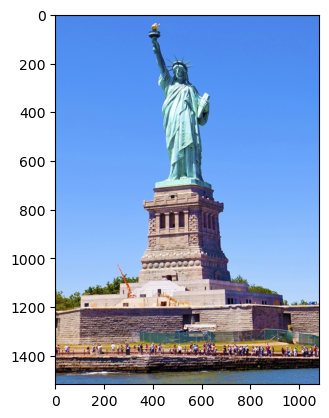

In [54]:
from PIL import Image
import matplotlib.pyplot as plt
image=Image.open(file) # 파일열기
plt.imshow(image) # 이미지 출력하기

In [59]:
# 읽어온 이미지의 크기 살펴보기
image_N=np.array(image) # 이미지 파일을 넘파이 어레이로 변환
image_N.shape # 변환된 어레이의 크기, 모양 보기

(1517, 1084, 3)

In [64]:
# 맨 왼쪽 상단의 픽셀정보보기
C=image_N[0,0,:]
C

array([ 78, 136, 236], dtype=uint8)

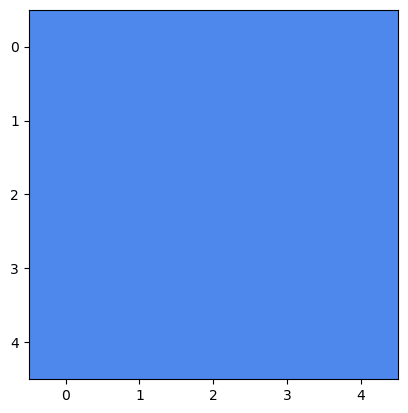

In [71]:
# 위 색깔 정보를 색으로 표현하기
D_img=np.zeros([5,5,3],dtype=np.uint8) # 가로 5, 세로 5 빈공간
D_img[:,:,:]=C # 모든 픽셀을 C 값으로 
plt.imshow(D_img) # 이미지출력

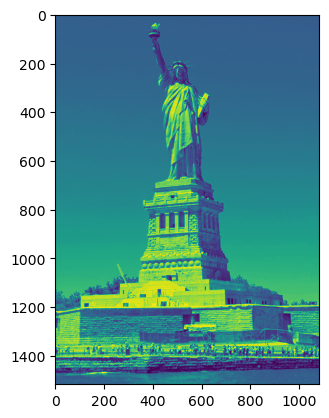

In [57]:
# getdata()는 픽셀정보를 가져온다. 
# band=0는 RGB에서 R에 대한 정보를 가져온다. 
imageM=np.array(image.getdata(band=0),int)
# 보통 이미지를 다루는 라이브러리는 픽셀을 열 기준으로 먼저 읽고
# 넘파이는 행 기준으로 먼저 읽기 때문에, 넘파이의 가로, 세로를 바꿔줘야 함
imageM.shape=(image.size[1],image.size[0])
plt.imshow(imageM)

In [56]:
imageM.shape

(1517, 1084)

In [72]:
from scipy.linalg import svd
u,s,vt=svd(imageM) # svd 수행
print(u.shape,s.shape,vt.shape)

(1517, 1517) (1084,) (1084, 1084)


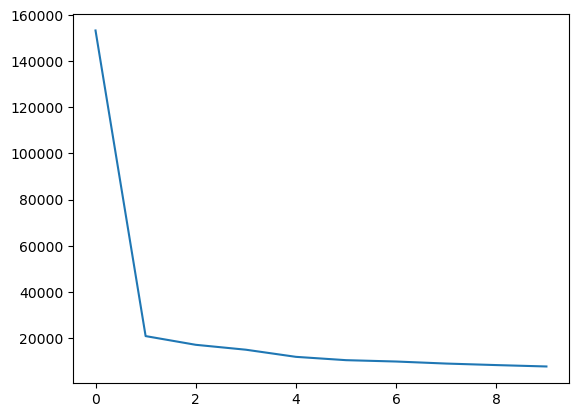

In [76]:
# 특이값 10개의 값 그리기
# svd를 수행하면 항상 특이값이 큰 순서부터 자동 정렬된다. 
plt.plot(s[:10])

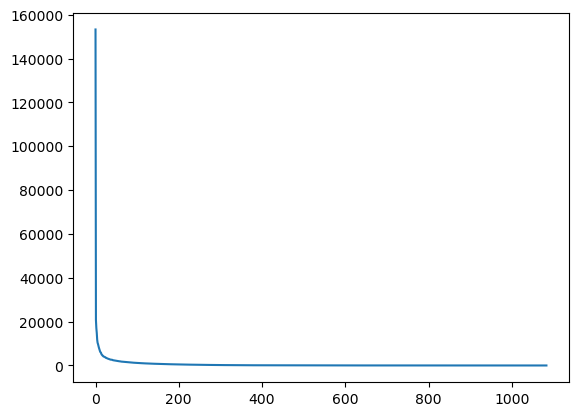

In [78]:
plt.plot(s)

Text(0.5, 1.0, 'n=20')

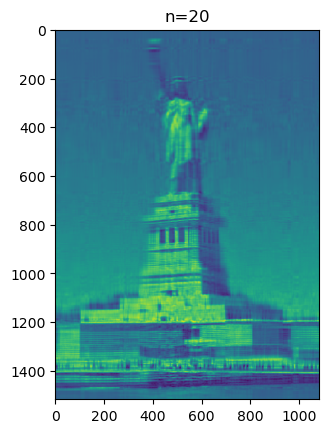

In [83]:
# 데이터의 일부를 발췌하여 이미지 다시 그려보기
n=20 # 불러올 특이값 개수 설정 
IM=np.zeros([1517,1084])

# 원래 행렬에서 특이값이 큰 순서대로 n개에 해당하는 행렬로 축약
for i in range(n): # 첫번째 부터 n-1번째 특이값까지
    # u 행렬의 i번째 열, vt행렬의 i번째 행을 불러서 행렬 곱 수행 (1517 by 1084 행렬이 됨)
    # 이렇게 만든 행렬에 s[i]의 고유값을 곱해서 행렬 업데이트
    # 업데이트된 행렬을 기존 행렬(IM)에 계속 더해감
    IM+=s[i]*(u[:,i].reshape(-1,1)@vt[i,:].reshape(1,-1))
plt.imshow(IM)
plt.title(f'n={n}')

Text(0.5, 1.0, 'n=10')

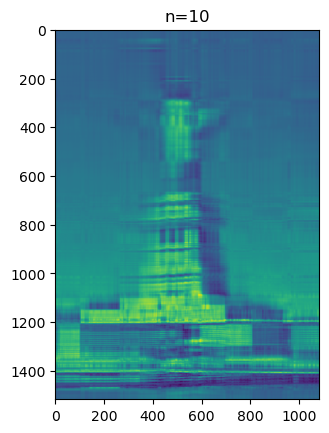

In [82]:
# 데이터의 일부를 발췌하여 이미지 다시 그려보기
n=10 # 불러올 특이값 개수 설정 
IM=np.zeros([1517,1084])

# 원래 행렬에서 특이값이 큰 순서대로 n개에 해당하는 행렬로 축약
for i in range(n): # 첫번째 부터 n-1번째 특이값까지
    # u 행렬의 i번째 열, vt행렬의 i번째 행을 불러서 행렬 곱 수행 (1517 by 1084 행렬이 됨)
    # 이렇게 만든 행렬에 s[i]의 고유값을 곱해서 행렬 업데이트
    # 업데이트된 행렬을 기존 행렬(IM)에 계속 더해감
    IM+=s[i]*(u[:,i].reshape(-1,1)@vt[i,:].reshape(1,-1))
plt.imshow(IM)
plt.title(f'n={n}')

Text(0.5, 1.0, 'n=5')

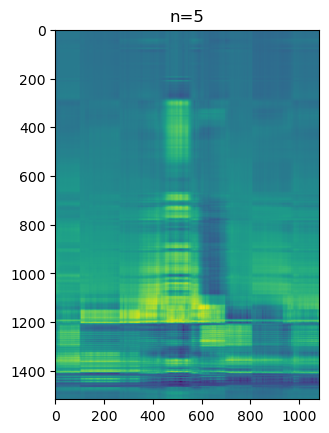

In [84]:
# 데이터의 일부를 발췌하여 이미지 다시 그려보기
n=5 # 불러올 특이값 개수 설정 
IM=np.zeros([1517,1084])

# 원래 행렬에서 특이값이 큰 순서대로 n개에 해당하는 행렬로 축약
for i in range(n): # 첫번째 부터 n-1번째 특이값까지
    # u 행렬의 i번째 열, vt행렬의 i번째 행을 불러서 행렬 곱 수행 (1517 by 1084 행렬이 됨)
    # 이렇게 만든 행렬에 s[i]의 고유값을 곱해서 행렬 업데이트
    # 업데이트된 행렬을 기존 행렬(IM)에 계속 더해감
    IM+=s[i]*(u[:,i].reshape(-1,1)@vt[i,:].reshape(1,-1))
plt.imshow(IM)
plt.title(f'n={n}')

Text(0.5, 1.0, 'n=100')

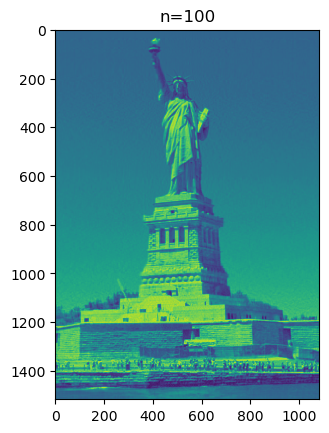

In [85]:
# 데이터의 일부를 발췌하여 이미지 다시 그려보기
n=100 # 불러올 특이값 개수 설정 
IM=np.zeros([1517,1084])

# 원래 행렬에서 특이값이 큰 순서대로 n개에 해당하는 행렬로 축약
for i in range(n): # 첫번째 부터 n-1번째 특이값까지
    # u 행렬의 i번째 열, vt행렬의 i번째 행을 불러서 행렬 곱 수행 (1517 by 1084 행렬이 됨)
    # 이렇게 만든 행렬에 s[i]의 고유값을 곱해서 행렬 업데이트
    # 업데이트된 행렬을 기존 행렬(IM)에 계속 더해감
    IM+=s[i]*(u[:,i].reshape(-1,1)@vt[i,:].reshape(1,-1))
plt.imshow(IM)
plt.title(f'n={n}')

# SVD를 이용한 선형회귀분석

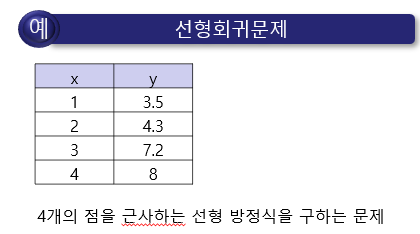

In [48]:
from sympy import Matrix

A=Matrix([[1,1],[2,1],[3,1],[4,1]])
b=Matrix([3.5,4.3,7.2,8])

#y=ax+b에서 coeff=(a,b)
coeff=(A.transpose()@A).inv()@A.transpose()@b

In [49]:
A*coeff-b

Matrix([
[            -0.21],
[0.630000000000001],
[            -0.63],
[0.210000000000001]])

In [50]:
Matrix(coeff)

Matrix([
[1.64],
[1.65]])

In [51]:
# ax+by+c=0 에서 (a,b,c)
# y=(-a/b)x-c/b
A1=Matrix(4,3,[1,3.5,1,2,4.3,1,3,7.2,1,4,8,1])
A1=np.array(A1).astype(float)
u,s,vt=np.linalg.svd(A1)
# c1=(a,b,c)
c1=Matrix(vt.transpose()[:,-1])

In [55]:
coeff1=Matrix(np.array([-c1[0],-c1[2]]).astype(float)/np.array(c1[1]).astype(float))
A*coeff1-b

Matrix([
[-0.0185403312614447],
[  0.735917526197944],
[ -0.609624616342669],
[   0.14483324111672]])

# 잠재의미분석

In [16]:
# 예제 문서
D = [
    "coke",
    "coke hamburger pizza",
    "hamburger",
    "라면",
    "짜장면 라면",
    "라면 떡뽂이"
]

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화 객체 생성
vectorizer = TfidfVectorizer()

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(D)
X = X.toarray() # 밀집행렬로 변환

In [29]:
from scipy.linalg import svd
from sympy import Matrix
import numpy as np

u,s,vt=svd(X) # svd 수행

M1=np.zeros([6,6])

# 원래 행렬에서 특이값이 큰 순서대로 n개에 해당하는 행렬로 축약
for i in range(2): # 첫번째 부터 n-1번째 특이값까지
    M1+=s[i]*(u[:,i].reshape(-1,1)@vt[i,:].reshape(1,-1))

Matrix(M1)

Matrix([
[ 0.43932989204967,  0.43932989204967, 0.230886084363959,                 0,                 0,                 0],
[ 0.62130629169255,  0.62130629169255, 0.326522231870729,                 0,                 0,                 0],
[0.439329892049669, 0.439329892049669, 0.230886084363959,                 0,                 0,                 0],
[                0,                 0,                 0, 0.284974678729433, 0.795937265254165, 0.284974678729433],
[                0,                 0,                 0, 0.246100387899816, 0.687360963424213, 0.246100387899816],
[                0,                 0,                 0, 0.246100387899816, 0.687360963424213, 0.246100387899816]])

In [32]:
Matrix(lsa_topic_matrix)

Matrix([
[ -5.8456445725121e-15,    0.662819652733433],
[-8.43764223834216e-15,    0.937368542303047],
[-6.04981272532369e-15,    0.662819652733434],
[    0.892153162441385, 8.01501600983695e-15],
[    0.770451747929967, 6.93250764227395e-15],
[    0.770451747929967,  6.9198051808466e-15]])

In [31]:
from sklearn.decomposition import TruncatedSVD

# LSA 수행
num_topics = 2
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_topic_matrix = lsa_model.fit_transform(X)

# 단어 목록
terms = vectorizer.get_feature_names_out()

In [14]:
terms

array(['coke', 'hamburger', 'pizza', '떡뽂이', '라면', '짜장면'], dtype=object)

In [15]:
# 주제와 관련된 주요 단어 출력
for i, topic in enumerate(lsa_model.components_):
    top_keywords_idx = topic.argsort()[-3:][::-1]  # 주요 단어 3개 추출
    top_keywords = [terms[idx] for idx in top_keywords_idx]
    print(f"Topic {i + 1}: {', '.join(top_keywords)}")

# 문서별 주제 할당
document_topics = lsa_model.transform(X)
print("\nDocument-Topic Matrix:")
print(document_topics)

Topic 1: 라면, 떡뽂이, 짜장면
Topic 2: coke, hamburger, pizza

Document-Topic Matrix:
[[ 0.00000000e+00  6.62819653e-01]
 [ 7.51212437e-17  9.37368542e-01]
 [ 6.45296364e-16  6.62819653e-01]
 [ 8.92153162e-01 -2.58329933e-16]
 [ 7.70451748e-01 -2.83442653e-16]
 [ 7.70451748e-01 -1.47044655e-16]]
